In [1]:
import numpy as np
import librosa
from scipy import signal
from scipy.io import wavfile
from scipy.signal import butter,filtfilt
from scipy.stats import kurtosis
import scipy.signal as signal
from scipy.integrate import simps
import matplotlib.pyplot as plt
import librosa.display
import sklearn
import pandas as pd
import seaborn as sns
import json

In [2]:
def load_data(data_path):
    with open(data_path,"r") as fp:
        data=json.load(fp)
    inputs = np.array(data["mfcc"])
    targets= np.array(data["labels"])
    
    return inputs,targets

In [3]:
inputs,targets=load_data("/content/drive/MyDrive/mfcc_3.json")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  after removing the cwd from sys.path.


In [ ]:
type(targets)

numpy.ndarray

In [ ]:
np.where(targets==1)

(array([  50,   51,   52,   53,   55,   57,   61,   62,   63,   64,   68,
          70,   72,   73,   75,   76,   77,   78,   79,   80,   83,   84,
          85,   90,   92,   94,   97,   98,   99,  100,  101,  108,  109,
         110,  115,  117,  118,  121,  122,  123,  125,  126,  266,  267,
         282,  387,  450,  455,  593,  601,  611,  638,  639,  641,  643,
         644,  646,  647,  648,  650,  653,  658,  665,  666,  669,  672,
         673,  674,  676,  677,  678,  682,  685,  686,  687,  689,  695,
         772,  836,  837,  838,  842,  843,  845,  846,  850,  851,  852,
         853,  854,  855,  856,  857,  858,  859,  860,  861,  863,  864,
         865,  866,  867,  868,  869,  871,  873,  874,  875,  876,  877,
         879,  881,  882,  883,  884,  885,  887,  888,  889,  890,  891,
         892,  893,  894,  895,  896,  897,  898,  899,  900,  902,  904,
         906,  907,  908,  909, 1018, 1019, 1020, 1021, 1022, 1023, 1024,
        1026, 1027, 1029, 1030, 1031, 

In [ ]:
inputs2=list(inputs.copy())
targets2=list(targets.copy())
print(len(inputs2))
print(len(targets2))

1611
1611


In [ ]:
inputs2=np.array(inputs2)
targets2=np.array(targets2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  """Entry point for launching an IPython kernel.


In [ ]:
INPUTS2=inputs2.copy()

In [ ]:
shape_diff=[]
for i in range(len(inputs2)):
    shape_diff.append(np.array(inputs2[i]).shape[0])

In [ ]:
INPUTS3=[]
for i in range(INPUTS2.shape[0]):
  A=np.zeros((max(shape_diff),13))#-np.array(INPUTS2[i]).shape[0]
  A[:np.array(INPUTS2[i]).shape[0],:]=INPUTS2[i]
  INPUTS3.append(A)

In [ ]:
print(min(shape_diff),max(shape_diff))

12 1294


In [ ]:
np.array(INPUTS3).shape

(1611, 1294, 13)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# def prepare_dataset(test_size,val_size):
#   X_train,X_test,y_train,y_test=train_test_split(inputs2,targets2,test_size=test_size,random_state=5)
#   X_train,X_valid,y_train,y_valid=train_test_split(X_train,y_train,test_size=val_size,random_state=5)

#   return np.array(X_train),np.array(X_valid),np.array(X_test),y_train,y_valid,y_test

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(INPUTS3,targets2,test_size=0.25,random_state=5)

In [ ]:
# X_train,X_valid,X_test,y_train,y_valid,y_test= prepare_dataset(0.25,0.2)

In [ ]:
print("Shape of X_train : {}, X_test : {}".format(len(X_train),len(X_test)))

Shape of X_train : 1208, X_test : 403


In [ ]:
y_train

array([0, 0, 0, ..., 0, 0, 1])

In [ ]:
type(X_train)

list

In [ ]:
dummy=y_train.copy()
dummyX=X_train.copy()

In [ ]:
ytrain_list=y_train.tolist()

In [ ]:
for i in range(4):
    for j in np.where(dummy==1)[0]:
        X_train.append(dummyX[j])
        ytrain_list.append(1)

In [ ]:
len(X_train)

2112

In [ ]:
y_train=np.array(ytrain_list)

In [ ]:
sum(y_train)

1130

In [ ]:
# list(inputs2).append(1)

In [ ]:
# len(np.where(np.array(targets2)==1)[0])

1180

In [ ]:
X_train,X_valid,y_train,y_valid=train_test_split(X_train,y_train,test_size=0.2,random_state=5)

In [ ]:
X_train=np.array(X_train)
X_test=np.array(X_test)
X_valid=np.array(X_valid)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  """Entry point for launching an IPython kernel.


12 1294


(2496, 1294, 13)

In [ ]:
def build_model(input_shape):
  model = keras.Sequential()
  model.add(keras.layers.LSTM(512,input_shape=input_shape,return_sequences=True))
  model.add(keras.layers.LSTM(512))

  model.add(keras.layers.Dense(128))
  model.add(keras.layers.Activation('tanh'))
  model.add(keras.layers.Dropout(0.6))

  model.add(keras.layers.Dense(64))
  model.add(keras.layers.Activation('tanh'))
  model.add(keras.layers.Dropout(0.6))

  model.add(keras.layers.Dense(32))
  model.add(keras.layers.Activation('tanh'))
  model.add(keras.layers.Dropout(0.6))

#   model.add(keras.layers.Dense(16))
#   model.add(keras.layers.Activation('tanh'))
#   model.add(keras.layers.Dropout(0.6))

#   model.add(keras.layers.Dense(8))
#   model.add(keras.layers.Activation('tanh'))
#   model.add(keras.layers.Dropout(0.6))

#   model.add(keras.layers.Dense(4))
#   model.add(keras.layers.Activation('tanh'))
#   model.add(keras.layers.Dropout(0.6))

  model.add(keras.layers.Dense(2,activation="sigmoid"))
  

  return model

In [ ]:
import tensorflow as tf
import tensorflow.keras as keras

In [ ]:
input_shape=(X_train.shape[1],X_train.shape[2])

In [ ]:
model = build_model(input_shape)

In [ ]:
!pip install tensorflow-addons

     |████████████████████████████████| 1.1 MB 5.1 MB/s 


In [ ]:
from keras.callbacks import Callback,ModelCheckpoint
from keras.models import Sequential,load_model
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier
import keras.backend as K
import tensorflow as tf
import tensorflow_addons as tfa

from sklearn.metrics import confusion_matrix
import numpy as np

In [ ]:
def get_f1(y_true, y_pred): #taken from old keras source code
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

In [ ]:
optimizer = keras.optimizers.SGD(learning_rate=10e-5)
#optimizer = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.01, amsgrad=False)
model.compile(optimizer=optimizer,
             loss="sparse_categorical_crossentropy",
             metrics=["accuracy"])
             #metrics=[tfa.metrics.F1Score(num_classes=2,average="micro",threshold=0.9)])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 1294, 512)         1077248   
                                                                 
 lstm_1 (LSTM)               (None, 512)               2099200   
                                                                 
 dense (Dense)               (None, 128)               65664     
                                                                 
 activation (Activation)     (None, 128)               0         
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 activation_1 (Activation)   (None, 64)                0

In [ ]:
mod_hist=model.fit(X_train,y_train,
          validation_data=(X_valid,y_valid),
          epochs=50,
          batch_size=64,
          #verbose=1,
          #class_weight=classWeight
          )

Epoch 1/50


KeyboardInterrupt: ignored

**Model 2 Resnet**

In [ ]:
path="/content/drive/MyDrive/Save_model/model_resnet34.pt"

In [ ]:
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils

class Train_Data(Dataset):
    def __init__(self,X_train,y_train,transform=None):
        self.X_train=X_train
        self.y_train=y_train
        self.transform=transform
    def __len__(self):
        return len(self.y_train)
    def __getitem__(self,idx):
        if torch.is_tensor(idx):
            idx=idx.tolist()
        data=self.X_train[idx]
        target=self.y_train[idx]
        sample={'X_train': data,'y_train':target}

        if self.transform:
            sample=self.transform(sample)

        return sample

class Test_Data(Dataset):
    def __init__(self,X_test,y_test,transform=None):
        self.X_test=X_test
        self.y_test=y_test
        self.transform=transform
    def __len__(self):
        return len(self.y_test)
    def __getitem__(self,idx):
        if torch.is_tensor(idx):
            idx=idx.tolist()
        sample={'X_train': self.X_test[idx],'y_train':self.y_test[idx]}

        if self.transform:
            sample=self.transform(sample)

        return sample

class Valid_Data(Dataset):
    def __init__(self,X_valid,y_valid,transform=None):
        self.X_valid=X_valid
        self.y_valid=y_valid
        self.transform=transform
    def __len__(self):
        return len(self.y_valid)
    def __getitem__(self,idx):
        if torch.is_tensor(idx):
            idx=idx.tolist()
        sample={'X_train': self.X_valid[idx],'y_train':self.y_valid[idx]}

        if self.transform:
            sample=self.transform(sample)

        return sample

In [ ]:
import torch
from torch.utils.data.sampler import SubsetRandomSampler

# number of subprocesses to use for data loading
num_workers = 0
# how many samples per batch to load
batch_size = 64


# convert data to a normalized torch.FloatTensor
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ])

train_sampler = SubsetRandomSampler(len(X_train))
valid_sampler = SubsetRandomSampler(len(X_valid))

# prepare data loaders (combine dataset and sampler)
train_loader = torch.utils.data.DataLoader(Train_Data(X_train,y_train), batch_size=batch_size,
    #sampler=train_sampler, 
    num_workers=num_workers)
valid_loader = torch.utils.data.DataLoader(Valid_Data(X_valid,y_valid), batch_size=batch_size, 
   # sampler=valid_sampler, 
   num_workers=num_workers)
test_loader = torch.utils.data.DataLoader(Test_Data(X_test,y_test), batch_size=batch_size, 
    num_workers=num_workers)

In [ ]:
import torchvision
import torchvision.transforms as transforms
import torch.optim as optim
import torch
import torch.nn as nn
import torchvision.models as models
import time
import os
import math
import copy

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Assuming that we are on a CUDA machine, this should print a CUDA device:

print(device)

train_on_gpu = torch.cuda.is_available()

cuda:0


In [ ]:
num_classes=2

model_ft = models.resnet34(pretrained=True)

num_ftrs = model_ft.fc.in_features

model_ft.fc = nn.Sequential(
     nn.Dropout(0.2),
     nn.Linear(model_ft.fc.in_features, num_classes)
)

model_ft.layer1[0].bn2=nn.Sequential(
    nn.Dropout(0.6),
    nn.BatchNorm2d(64)
)

model_ft.layer1[1].bn2=nn.Sequential(
    nn.Dropout(0.6),
    nn.BatchNorm2d(64)
)

model_ft.layer4[2].bn2=nn.Sequential(
    nn.Dropout(0.6),
    nn.BatchNorm2d(512)
)

model_ft = model_ft.cuda()

criterion = nn.CrossEntropyLoss()

optimizer_ft=optim.SGD(model_ft.parameters(),lr=0.01,momentum=0.66)
#scheduler = optim.lr_scheduler.StepLR(optimizer_ft, step_size=10, gamma=0.1)

In [ ]:
print(model_ft)

In [ ]:
!pip install torchmetrics

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

from torchmetrics import Accuracy

### Optuna

In [ ]:
!pip3 install optuna

In [ ]:
import optuna

In [ ]:
def objective(trial):
    _dropout1=trial.suggest_float("dropou1",0.2,0.7)
    _dropout2=trial.suggest_float("dropou2",0.2,0.7)
    _dropout3=trial.suggest_float("dropou3",0.2,0.7)
    _dropout4=trial.suggest_float("dropou4",0.2,0.7)
    _lr=trial.suggest_loguniform("lr",1e-5,1e-2)
    _momentum=trial.suggest_float("momentum",0.5,0.99)

    # Define the model with suggested params
    num_classes=2

    model_ft = models.resnet34(pretrained=True)

    num_ftrs = model_ft.fc.in_features

    model_ft.fc = nn.Sequential(
        nn.Dropout(_dropout1),
        nn.Linear(model_ft.fc.in_features, num_classes)
    )

    model_ft.layer1[0].bn2=nn.Sequential(
        nn.Dropout(_dropout2),
        nn.BatchNorm2d(64)
    )

    model_ft.layer1[1].bn2=nn.Sequential(
        nn.Dropout(_dropout3),
        nn.BatchNorm2d(64)
    )

    model_ft.layer4[2].bn2=nn.Sequential(
        nn.Dropout(_dropout4),
        nn.BatchNorm2d(512)
    )

    model_ft = model_ft.cuda()

    criterion = nn.CrossEntropyLoss()

    optimizer_ft=optim.SGD(model_ft.parameters(),lr=_lr,momentum=_momentum)


    ## Sort of training

    train_loss_list = []
    valid_loss_list = []

    train_,valid_=[],[]
    train_preds=[]
    train_target=[]
    valid_preds=[]
    valid_target=[]


    train_loss = 0.0
    valid_loss = 0.0
    
    ###################
    # train the model #
    ###################
    model_ft.train()
    for _,data_ in enumerate(train_loader):
        data,target=data_["X_train"].float(),data_["y_train"]
        data=torch.stack([data,data,data],dim=2).permute(0,2,1,3)

        if train_on_gpu:
            data, target = data.to(device), target.to(device)
        # clear the gradients of all optimized variables
        optimizer_ft.zero_grad()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model_ft(data)
        # calculate the batch loss
        loss = criterion(output, target)
        #print(output.cpu().detach().numpy()[0][1]>0)

        for i in range(len(output)):
            for j in range(2):
                if output.cpu().detach().numpy()[i][j]>0:
                    train_.append(j)

        # for i in range(1):
        #     if output.cpu().detach().numpy()[0][i]>0:
        #         train_.append(i)        
        train_preds.append(train_)
        train_target.append(target)
        # backward pass: compute gradient of the loss with respect to model parameters
        loss.backward()
        # perform a single optimization step (parameter update)
        optimizer_ft.step()
        # update training loss
        train_loss += loss.item()*data.size(0)

    return train_loss


In [ ]:
# Create Study object
study = optuna.create_study(direction="minimize")
# Optimize the study, use more trials to obtain better result, use less trials to be more cost-efficient
study.optimize(objective, n_trials=2) # Use more 
# Print the result
best_params = study.best_params
best_score = study.best_value
print(f"Best score: {best_score}\n")
print(f"Optimized parameters: {best_params}\n")

[I 2022-03-17 02:15:33,162] A new study created in memory with name: no-name-c4dc5977-5570-40be-967c-cbabf22ec2d4
[I 2022-03-17 02:15:56,515] Trial 0 finished with value: 1251.3493485450745 and parameters: {'dropou1': 0.6126659857013239, 'dropou2': 0.5553135265109346, 'dropou3': 0.4884574336495613, 'dropou4': 0.6012680498178635, 'lr': 0.0001589934409619758, 'momentum': 0.7776799144338218}. Best is trial 0 with value: 1251.3493485450745.
[I 2022-03-17 02:16:19,705] Trial 1 finished with value: 1231.1272968053818 and parameters: {'dropou1': 0.57469650186878, 'dropou2': 0.26838967284665755, 'dropou3': 0.5984430816716154, 'dropou4': 0.49348496044142914, 'lr': 0.00012986423362221756, 'momentum': 0.7615402342103706}. Best is trial 1 with value: 1231.1272968053818.


Best score: 1231.1272968053818

Optimized parameters: {'dropou1': 0.57469650186878, 'dropou2': 0.26838967284665755, 'dropou3': 0.5984430816716154, 'dropou4': 0.49348496044142914, 'lr': 0.00012986423362221756, 'momentum': 0.7615402342103706}



In [ ]:
best_params

{'dropou1': 0.57469650186878,
 'dropou2': 0.26838967284665755,
 'dropou3': 0.5984430816716154,
 'dropou4': 0.49348496044142914,
 'lr': 0.00012986423362221756,
 'momentum': 0.7615402342103706}

In [ ]:
num_classes=2

model_ft = models.resnet34(pretrained=True)

num_ftrs = model_ft.fc.in_features

model_ft.fc = nn.Sequential(
     nn.Dropout(best_params["dropou1"]),
     nn.Linear(model_ft.fc.in_features, num_classes)
)

model_ft.layer1[0].bn2=nn.Sequential(
    nn.Dropout(best_params["dropou2"]),
    nn.BatchNorm2d(64)
)

model_ft.layer1[1].bn2=nn.Sequential(
    nn.Dropout(best_params["dropou3"]),
    nn.BatchNorm2d(64)
)

model_ft.layer4[2].bn2=nn.Sequential(
    nn.Dropout(best_params["dropou4"]),
    nn.BatchNorm2d(512)
)

model_ft = model_ft.cuda()

criterion = nn.CrossEntropyLoss()

optimizer_ft=optim.SGD(model_ft.parameters(),lr=best_params["lr"],momentum=best_params["momentum"])
#scheduler = optim.lr_scheduler.StepLR(optimizer_ft, step_size=10, gamma=0.1)

In [ ]:
# number of epochs to train the model
n_epochs = 60

valid_loss_min = np.Inf # track change in validation loss

train_loss_list = []
valid_loss_list = []

train_,valid_=[],[]
train_preds=[]
train_target=[]
valid_preds=[]
valid_target=[]

for epoch in range(1, n_epochs+1):

    # keep track of training and validation loss
    train_loss = 0.0
    valid_loss = 0.0
    
    ###################
    # train the model #
    ###################
    model_ft.train()
    for _,data_ in enumerate(train_loader):
        data,target=data_["X_train"].float(),data_["y_train"]
        data=torch.stack([data,data,data],dim=2).permute(0,2,1,3)

        if train_on_gpu:
            data, target = data.to(device), target.to(device)
        # clear the gradients of all optimized variables
        optimizer_ft.zero_grad()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model_ft(data)
        # calculate the batch loss
        loss = criterion(output, target)
        #print(output.cpu().detach().numpy()[0][1]>0)

        for i in range(len(output)):
            for j in range(2):
                if output.cpu().detach().numpy()[i][j]>0:
                    train_.append(j)

        # for i in range(1):
        #     if output.cpu().detach().numpy()[0][i]>0:
        #         train_.append(i)        
        train_preds.append(train_)
        train_target.append(target)
        # backward pass: compute gradient of the loss with respect to model parameters
        loss.backward()
        # perform a single optimization step (parameter update)
        optimizer_ft.step()
        # update training loss
        train_loss += loss.item()*data.size(0)
    #######################
    #  Adding a scheduler #
    #scheduler.step()    
    ######################    
    # validate the model #
    ######################
    model_ft.eval()
    for _,data_ in enumerate(valid_loader):
        data,target=data_["X_train"].float(),data_["y_train"].long()
        data=torch.stack([data,data,data],dim=2).permute(0,2,1,3)
        # move tensors to GPU if CUDA is available
        if train_on_gpu:
            data, target = data.to(device), target.to(device)
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model_ft(data)
        for i in range(1):
            if output.cpu().detach().numpy()[0][i]>0:
                valid_.append(i)
        valid_preds.append(valid_)
        valid_target.append(target)
        # calculate the batch loss
        loss = criterion(output, target)
        # update average validation loss 
        valid_loss += loss.item()*data.size(0)
    
        # metrics
    training_accuracy = Accuracy()
    #print("Train Pred ={}, vs  Train Target ={}".format(train_preds[1],train_target[1]))
    # ta=training_accuracy(torch.tensor(train_preds), train_target)
    # validation_accuracy = Accuracy()
    # va=validation_accuracy(valid_preds, valid_target)



    # calculate average losses
    train_loss = train_loss/len(train_loader.sampler)
    valid_loss = valid_loss/len(valid_loader.sampler)   
    # print training/validation statistics 
    print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
        epoch, train_loss, valid_loss))
    train_loss_list.append(train_loss)
    valid_loss_list.append(valid_loss)
    
    # save model if validation loss has decreased
    if valid_loss <= valid_loss_min:
        print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
        valid_loss_min,
        valid_loss))
        torch.save(model_ft.state_dict(), path)
        valid_loss_min = valid_loss

Epoch: 1 	Training Loss: 0.746138 	Validation Loss: 0.688769
Validation loss decreased (inf --> 0.688769).  Saving model ...
Epoch: 2 	Training Loss: 0.721960 	Validation Loss: 0.692382
Epoch: 3 	Training Loss: 0.708808 	Validation Loss: 0.694276
Epoch: 4 	Training Loss: 0.709023 	Validation Loss: 0.691144
Epoch: 5 	Training Loss: 0.708014 	Validation Loss: 0.687576
Validation loss decreased (0.688769 --> 0.687576).  Saving model ...
Epoch: 6 	Training Loss: 0.712397 	Validation Loss: 0.686051
Validation loss decreased (0.687576 --> 0.686051).  Saving model ...
Epoch: 7 	Training Loss: 0.701668 	Validation Loss: 0.684460
Validation loss decreased (0.686051 --> 0.684460).  Saving model ...
Epoch: 8 	Training Loss: 0.687494 	Validation Loss: 0.684355
Validation loss decreased (0.684460 --> 0.684355).  Saving model ...
Epoch: 9 	Training Loss: 0.694336 	Validation Loss: 0.682232
Validation loss decreased (0.684355 --> 0.682232).  Saving model ...
Epoch: 10 	Training Loss: 0.685162 	Valida

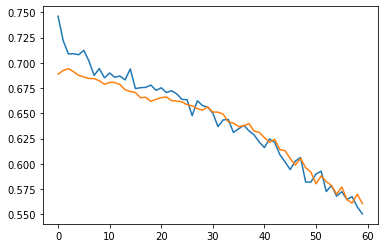

In [ ]:
plt.plot(train_loss_list)
plt.plot(valid_loss_list)

In [ ]:
path="/content/drive/MyDrive/Save_model/Model_ninty_four_percent/model_resnet34_ninty_four_percent.pt"

In [ ]:
model_ft.load_state_dict(torch.load(path))

<All keys matched successfully>

In [ ]:
# track test loss
test_loss = 0.0
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

model_ft.eval()
# iterate over test data
for _, data_ in enumerate(test_loader):
    data,target=data_["X_train"].float(),data_["y_train"]
    data=torch.stack([data,data,data],dim=2).permute(0,2,1,3)
    # move tensors to GPU if CUDA is available
    if train_on_gpu:
        data, target = data.cuda(), target.cuda()
    # forward pass: compute predicted outputs by passing inputs to the model
    output = model_ft(data)
    # calculate the batch loss
    loss = criterion(output, target)
    # update test loss 
    test_loss += loss.item()*data.size(0)
    # convert output probabilities to predicted class
    _, pred = torch.max(output, 1)    
    # compare predictions to true label
    correct_tensor = pred.eq(target.data.view_as(pred))
    correct = np.squeeze(correct_tensor.numpy()) if not train_on_gpu else np.squeeze(correct_tensor.cpu().numpy())
    # calculate test accuracy for each object class
    #print(target.data)
    for i in range(len(target.data)):
        label = target.data[i]
        class_correct[label] += correct[i].item()
        class_total[label] += 1

#print(target.data)
# average test loss
test_loss = test_loss/len(test_loader.dataset)
print('Test Loss: {:.6f}\n'.format(test_loss))



print('\nTest Accuracy (Overall): %2d%% (%2d/%2d)' % (
    100. * np.sum(class_correct) / np.sum(class_total),
    np.sum(class_correct), np.sum(class_total)))

Test Loss: 0.119468


Test Accuracy (Overall): 96% (388/403)


In [ ]:
class_correct[:2]

[320.0, 68.0]

In [ ]:
class_total[:2]

[334.0, 69.0]

|   |Pred Positive  | Pred Negative  |   |   |
|---|---|---|---|---|
|   Positive| 320  |  14 |   |   |
|  Negative| 5  | 68  |   |   |

In [ ]:
320/(334)

In [1]:
Precision=320/334
Recall=320/(325)

In [6]:
Precision

0.9580838323353293

In [7]:
Recall

0.9846153846153847

In [2]:
F1=2*(Precision*Recall)/(Precision+Recall)

In [3]:
print("The F1 Score is : {}".format(F1))

The F1 Score is : 0.9711684370257967


In [4]:
Accuracy=(320+68)/(334+73)

In [5]:
print("The Accuracy is : {}".format(Accuracy))

The Accuracy is : 0.9533169533169533


|   |Values  |
|---|---|
|   Precision| 0.958  |
|  Recall| 0.985  |
|  F1    | 0.971 |
|  Specificity|0.83  |
|  Accuracy| 95%  |

In [ ]:
Specificity=68/(68+14)

print("Specifity tells us how good the system is at removing false alarms.{}The Specificity is {}".format("\n",Specificity))

Specifity tells us how good the system is at removing false alarms.
The Specificity is 0.8292682926829268


In [ ]:
next(enumerate(test_loader))

In [ ]:
torch.save(model_ft.state_dict(), '/content/drive/MyDrive/Save_model/model_resnet34_ninty_four_percent.pt')

In [6]:
import pickle

# a = {"Train_loss":train_loss_list,
#      "Valid_loss":valid_loss_list}


# with open('/content/drive/MyDrive/Save_model/model_resnet34_loss.pickle', 'wb') as handle:
#     pickle.dump(a, handle, protocol=pickle.HIGHEST_PROTOCOL)

with open('/content/drive/MyDrive/Save_model/Model_ninty_four_percent/model_resnet34_loss.pickle', 'rb') as handle:
    b = pickle.load(handle)

# print(a == b)

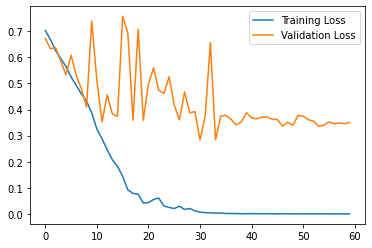

In [8]:
plt.plot(b["Train_loss"])
plt.plot(b["Valid_loss"])
plt.legend(["Training Loss","Validation Loss"])